# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR, SVC # suport vector regression / classification
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # 2차원으로 축소, 주로 시각화에 활용(비슷한 구조끼리 데이터를 정리하여 구조 이해 도움)

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [4]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 평가: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 평가: {}'.format(model.score(X_test, y_test)))

학습 데이터 평가: 0.2177283706374875
평가 데이터 평가: 0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [5]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print('학습 데이터 평가: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 평가: {}'.format(model.score(X_test, y_test)))

학습 데이터 평가: 0.9014084507042254
평가 데이터 평가: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [6]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel = 'linear')
linear_svr.fit(X_train, y_train)

print('Linear SVR 학습 데이터 평가: {}'.format(linear_svr.score(X_train, y_train)))
print('Linear SVR 평가 데이터 평가: {}'.format(linear_svr.score(X_test, y_test)))

polynomial_svr = SVR(kernel = 'poly')
polynomial_svr.fit(X_train, y_train)

print('Polynomial SVR 학습 데이터 점수: {}'.format(polynomial_svr.score(X_train, y_train)))
print('Polynomial SVR 평가 데이터 점수: {}'.format(polynomial_svr.score(X_test, y_test)))

rbf_svr = SVR(kernel = 'rbf')
rbf_svr.fit(X_train, y_train)

print('RBF SVR 학습 데이터 평가: {}'.format(rbf_svr.score(X_train, y_train)))
print('RBF SVR 평가 데이터 평가: {}'.format(rbf_svr.score(X_test, y_test)))

Linear SVR 학습 데이터 평가: 0.715506620496448
Linear SVR 평가 데이터 평가: 0.6380398541506058
Polynomial SVR 학습 데이터 점수: 0.2024454261446289
Polynomial SVR 평가 데이터 점수: 0.133668450367462
RBF SVR 학습 데이터 평가: 0.2177283706374875
RBF SVR 평가 데이터 평가: 0.13544178468518187


In [7]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train, y_train)

print('Linear SVC 학습 데이터 평가: {}'.format(linear_svc.score(X_train, y_train)))
print('Linear SVC 평가 데이터 평가: {}'.format(linear_svc.score(X_test, y_test)))

polynomial_svc = SVC(kernel = 'poly')
polynomial_svc.fit(X_train, y_train)

print('Polynomial SVC 학습 데이터 점수: {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVC 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))

rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train, y_train)

print('RBF SVC 학습 데이터 평가: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 평가: {}'.format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 평가: 0.960093896713615
Linear SVC 평가 데이터 평가: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.9014084507042254
Polynomial SVC 평가 데이터 점수: 0.9230769230769231
RBF SVC 학습 데이터 평가: 0.9014084507042254
RBF SVC 평가 데이터 평가: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [8]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [9]:
polynomial_svc = SVC(kernel = 'poly', degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print('kernel=ploy, degree={}, C={}, gamma={}'.format(2, 0.1, 'auto'))
print('Polynomial SVC 학습 데이터 점수: {}'.format(polynomial_svc.score(X_train, y_train)))
print('Polynomial SVC 평가 데이터 점수: {}'.format(polynomial_svc.score(X_test, y_test)))

kernel=ploy, degree=2, C=0.1, gamma=auto
Polynomial SVC 학습 데이터 점수: 0.9835680751173709
Polynomial SVC 평가 데이터 점수: 0.993006993006993


In [10]:
rbf_svc = SVC(kernel = 'rbf', C=2.0, gamma='scale') # rbf는 'degree' 파라미터가 없다.
rbf_svc.fit(X_train, y_train)

print('kernel=ploy, C={}, gamma={}'.format(2.0, 'scale'))
print('RBF SVC 학습 데이터 평가: {}'.format(rbf_svc.score(X_train, y_train)))
print('RBF SVC 평가 데이터 평가: {}'.format(rbf_svc.score(X_test, y_test)))

kernel=ploy, C=2.0, gamma=scale
RBF SVC 학습 데이터 평가: 0.9154929577464789
RBF SVC 평가 데이터 평가: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [12]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
model = SVC()
model.fit(X_train, y_train)

print('SVC 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('SVC 평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.9300699300699301


## Linear SVR

### 보스턴 주택 가격

In [17]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train) # Train-Test로 분리하였을 경우 전체 데이터가 아닌 훈련 데이터에 대해서만 fit()을 적용해야한다.
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [19]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7182471472543905
평가 데이터 점수: 0.6632705841807324


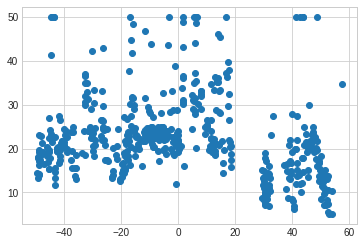

In [21]:
X_comp = TSNE(n_components=1).fit_transform(X) # 저차원 변환
plt.scatter(X_comp, y); # 시각화

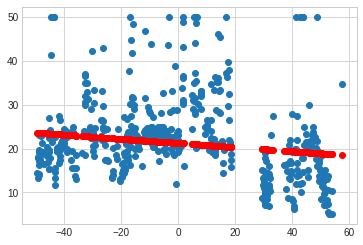

In [22]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [23]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.03326726, 0.02213526, 0.02669311, 0.02715349, 0.02855372]),
 'score_time': array([0.00241113, 0.0014143 , 0.00230169, 0.00247645, 0.00226641]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [24]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}] # margin 폭 지정(값이 클수록 폭도 커진다.)

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [25]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

In [26]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [28]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.5204909355404788
평가 데이터 점수: 0.4500421183454605


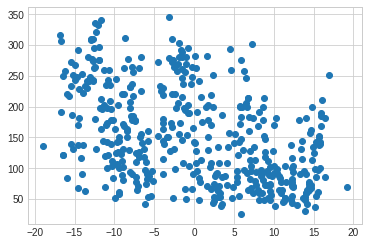

In [30]:
X_comp = TSNE(n_components=1).fit_transform(X) # 저차원 변환
plt.scatter(X_comp, y); # 시각화

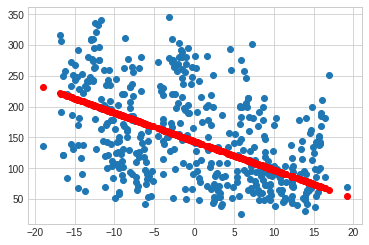

In [31]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [32]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.03531384, 0.02018142, 0.02562642, 0.02560973, 0.01782084]),
 'score_time': array([0.0150218 , 0.00149393, 0.00146246, 0.00146699, 0.00146151]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [33]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [34]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

## Kernel SVR

### 보스턴 주택 가격

In [35]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [37]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6957839889671082
평가 데이터 점수: 0.5625966072712547


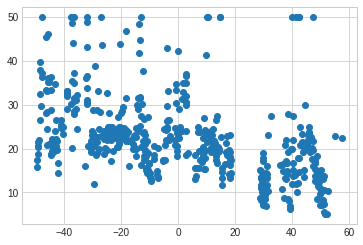

In [39]:
X_comp = TSNE(n_components=1).fit_transform(X) # 저차원 변환
plt.scatter(X_comp, y); # 시각화

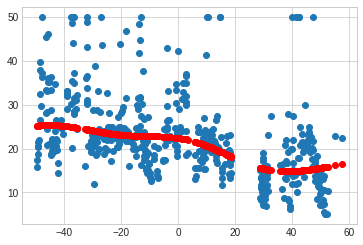

In [40]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [41]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02737093, 0.04157233, 0.01937795, 0.03211093, 0.01912761]),
 'score_time': array([0.00357342, 0.00364399, 0.00425601, 0.00306058, 0.00347495]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [42]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [43]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [44]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamma': 

In [45]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

In [46]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [48]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.17589023612453636
평가 데이터 점수: 0.18577736259571087


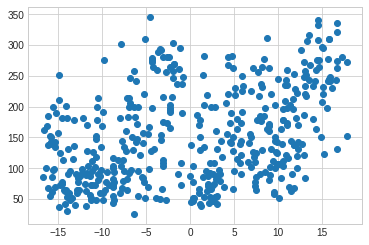

In [50]:
X_comp = TSNE(n_components=1).fit_transform(X) # 저차원(1) 변환
plt.scatter(X_comp, y); # 시각화

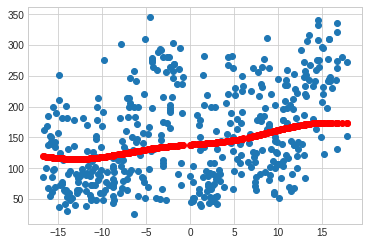

In [51]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [52]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.03678322, 0.02845931, 0.02791834, 0.01818395, 0.01275277]),
 'score_time': array([0.00251102, 0.00246048, 0.01003814, 0.00337958, 0.00242877]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [53]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [54]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [55]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='sigmoid',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamm

In [56]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [57]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [58]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3922015253325889
평가 데이터 점수: 0.3499938564924959


## Linear SVC

### 유방암

In [59]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [61]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9824175824175824
평가 데이터 점수: 0.9824561403508771


In [63]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [64]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [65]:
X_comp = TSNE(n_components=2).fit_transform(X) # 저차원 변환
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

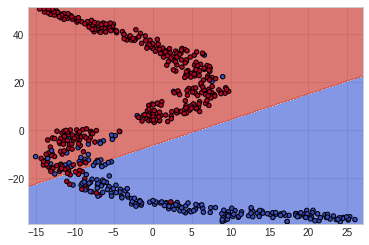

In [66]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [67]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00864482, 0.01121259, 0.00668645, 0.00618744, 0.00621319]),
 'score_time': array([0.0027051 , 0.00099158, 0.00087452, 0.00092196, 0.00085235]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [68]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [69]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

In [70]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [72]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [74]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [75]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [76]:
X_comp = TSNE(n_components=2).fit_transform(X) # 저차원 변환
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

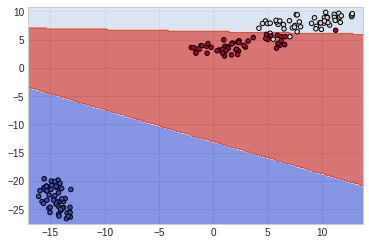

In [77]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [78]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00178051, 0.00479054, 0.00159907, 0.00161886, 0.00152111]),
 'score_time': array([0.00054908, 0.00048804, 0.00050139, 0.00047874, 0.00047994]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [79]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [80]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 와인

In [81]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [83]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9444444444444444


In [85]:
X_comp = TSNE(n_components=2).fit_transform(X) # 저차원 변환
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

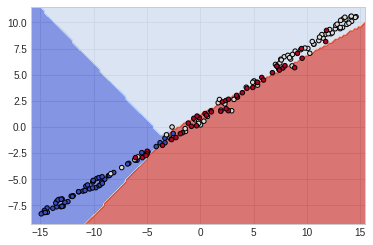

In [86]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [87]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00219655, 0.00293279, 0.0017879 , 0.00513268, 0.00167179]),
 'score_time': array([0.00052786, 0.00056648, 0.00053072, 0.00063276, 0.00048041]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [88]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=

In [89]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## Kernel SVC

### 유방암

In [90]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [92]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9846153846153847
평가 데이터 점수: 0.9912280701754386


In [94]:
X_comp = TSNE(n_components=2).fit_transform(X) # 저차원 변환
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

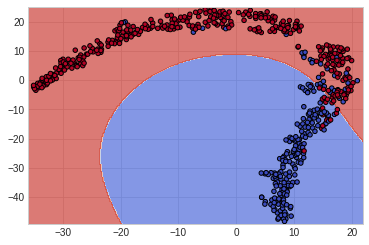

In [95]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [96]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00752592, 0.0070262 , 0.01560569, 0.01018143, 0.00756121]),
 'score_time': array([0.0016675 , 0.00528979, 0.0018239 , 0.00907063, 0.00221181]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [97]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [98]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

In [99]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [101]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9333333333333333


In [103]:
X_comp = TSNE(n_components=2).fit_transform(X) # 저차원 변환
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

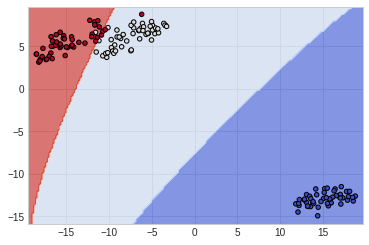

In [104]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [105]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00250173, 0.0024035 , 0.00225616, 0.00220942, 0.00179076]),
 'score_time': array([0.00070834, 0.00068569, 0.00066447, 0.00073361, 0.00054622]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [106]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [107]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 와인

In [108]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # fit은 위 코드에서 수행했으므로 transform만 실행
X_test = scaler.transform(X_test)

In [110]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


In [112]:
X_comp = TSNE(n_components=2).fit_transform(X) # 저차원 변환
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

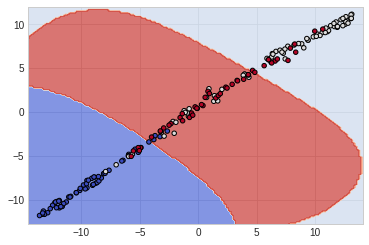

In [113]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [114]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00244689, 0.00248694, 0.00292659, 0.00237203, 0.00220823]),
 'score_time': array([0.00062466, 0.00068045, 0.00062943, 0.00062132, 0.00060844]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [115]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [116]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)